In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from scipy import stats    
import math
from sklearn.decomposition import PCA
from scipy.interpolate import Rbf
import warnings
warnings.filterwarnings("ignore")

In [2]:
'''wpop contains the log10 of world population time series'''
wpop=np.log10(pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_866861.csv", header=2).drop(["Country Code", "Indicator Name", "Indicator Code", "2019", "Unnamed: 64"], axis=1).set_index("Country Name").dropna(axis=0))



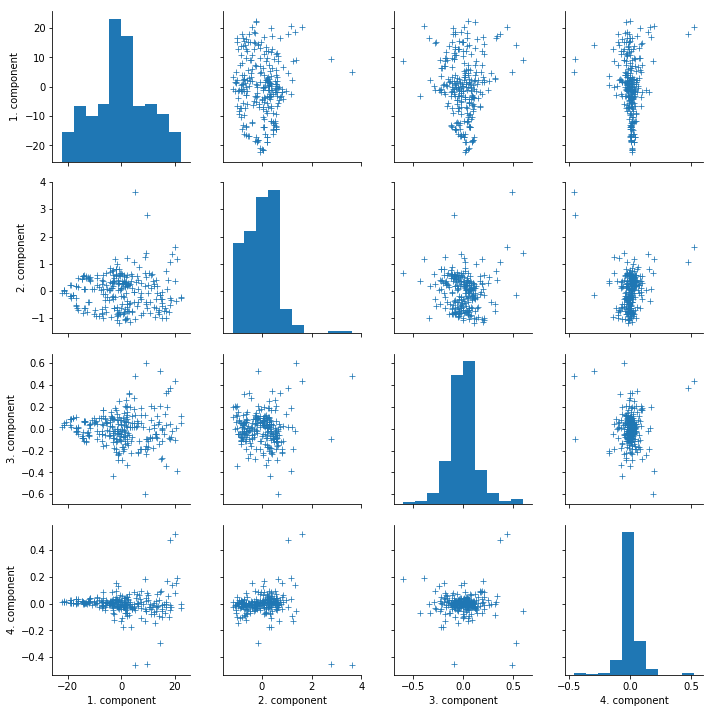

In [3]:
pca = PCA(n_components=4)
vecs = pca.fit_transform(wpop)
vecs1 = pca.fit_transform(wpop.T)
sns.pairplot(pd.DataFrame(vecs, columns=["1. component", "2. component", "3. component", "4. component"]), markers="+")


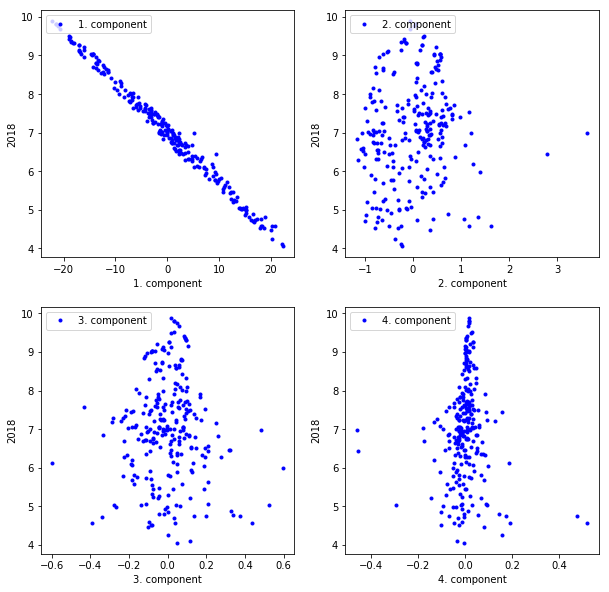

In [4]:
counter = 0
plt.figure(figsize=(10, 10))
for i in range(len(vecs[0,:])):
    plt.subplot(2, 2, counter+1)
    plt.plot(vecs[:,i], wpop["2018"], "b.", label=str(i+1) + ". component")
    plt.xlabel(str(i+1) + ". component")
    plt.ylabel("2018")
    plt.legend(loc="upper left")
    counter += 1

In [5]:
countries=pd.DataFrame(vecs[:,0], index=wpop.index).sort_values(0, ascending=False).iloc[0:4,:].index

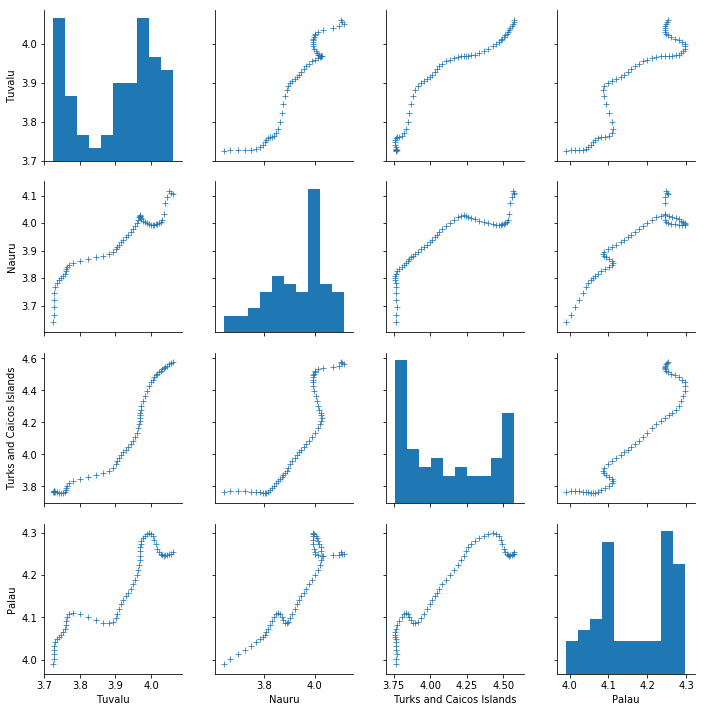

In [83]:
tmp_4=pd.concat([wpop.loc[countries[0],:],
wpop.loc[countries[1],:],
wpop.loc[countries[2],:],
wpop.loc[countries[3],:]], axis=1)

sns.pairplot(tmp_4, markers="+")

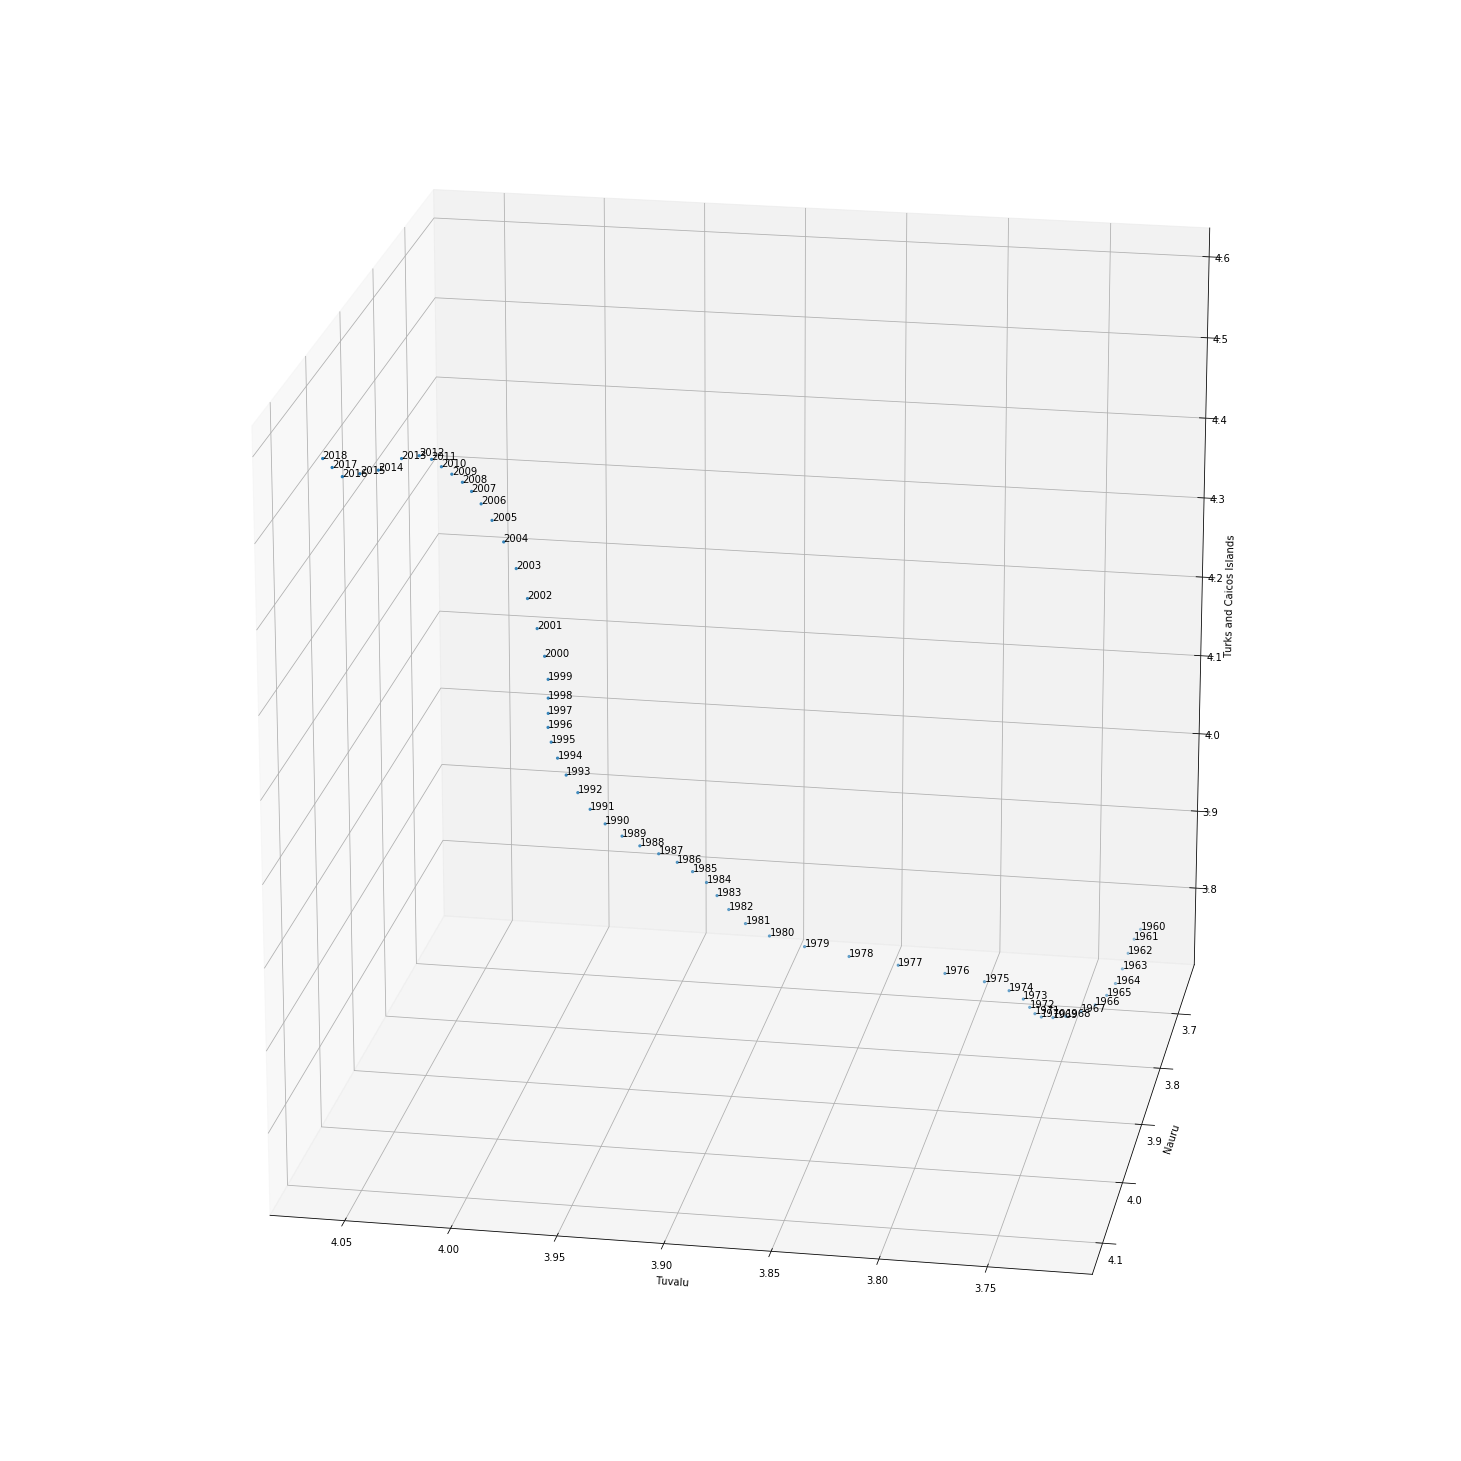

In [7]:
fig = plt.figure(figsize = (20, 20))
ax = Axes3D(fig)


ax.scatter(wpop.loc[countries[0],:], wpop.loc[countries[1], :], wpop.loc[countries[2],:], marker=".")
for i in range(len(wpop.columns)):
    ax.text(wpop.loc[countries[0],:][i], wpop.loc[countries[1], :][i], wpop.loc[countries[2],:][i], wpop.columns[i])
ax.set_xlabel(countries[0])
ax.set_ylabel(countries[1])
ax.set_zlabel(countries[2])
ax.view_init(elev=20, azim=100)
plt.show()

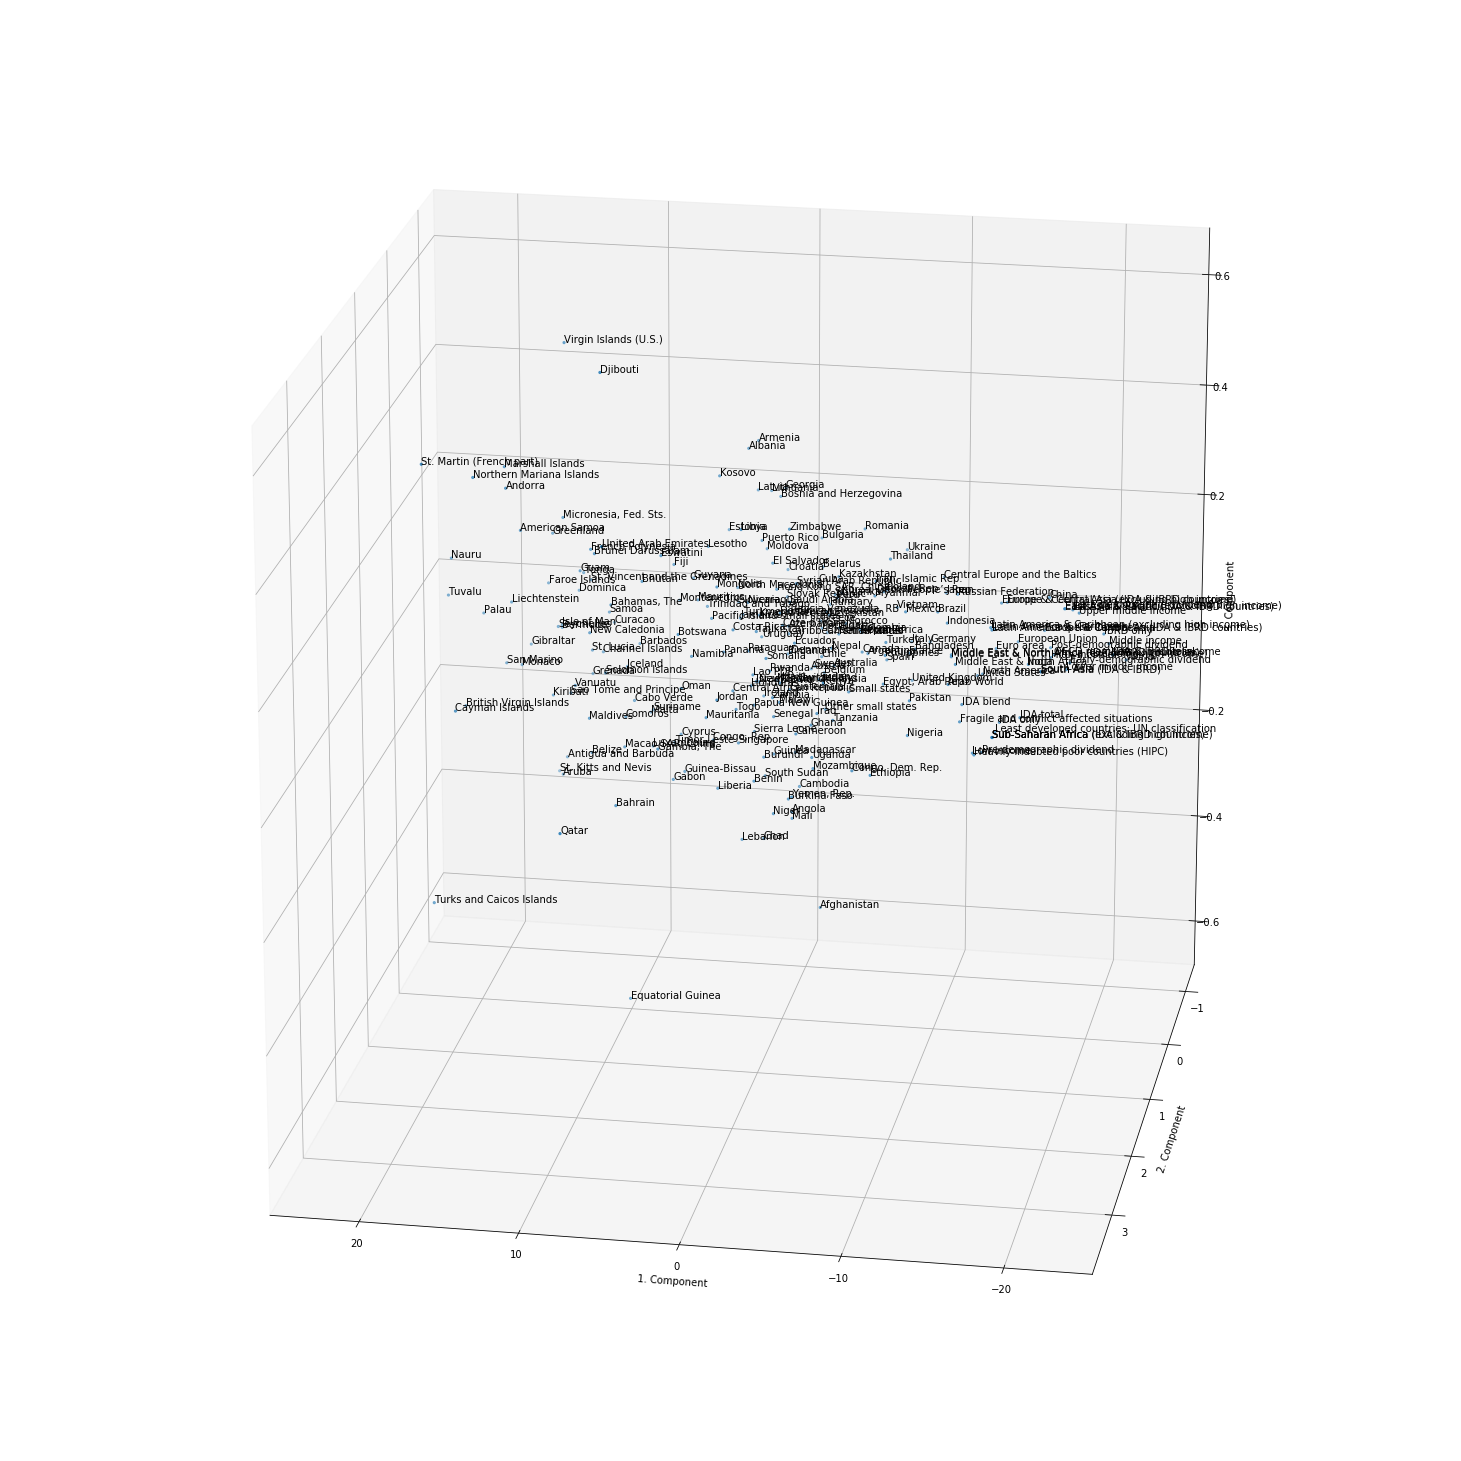

In [9]:
fig = plt.figure(figsize=(20, 20))
ax = Axes3D(fig)


ax.scatter(vecs[:,0], vecs[:,1], vecs[:,2], marker=".")
for i in range(len(wpop.index)):
    ax.text(vecs[i,0], vecs[i,1], vecs[i,2], wpop.index[i])
 
ax.set_xlabel('1. Component')
ax.set_ylabel('2. Component')
ax.set_zlabel('3. Component')
ax.view_init(elev=20, azim=100)
plt.show()

Text(0,0.5,'2. Component')

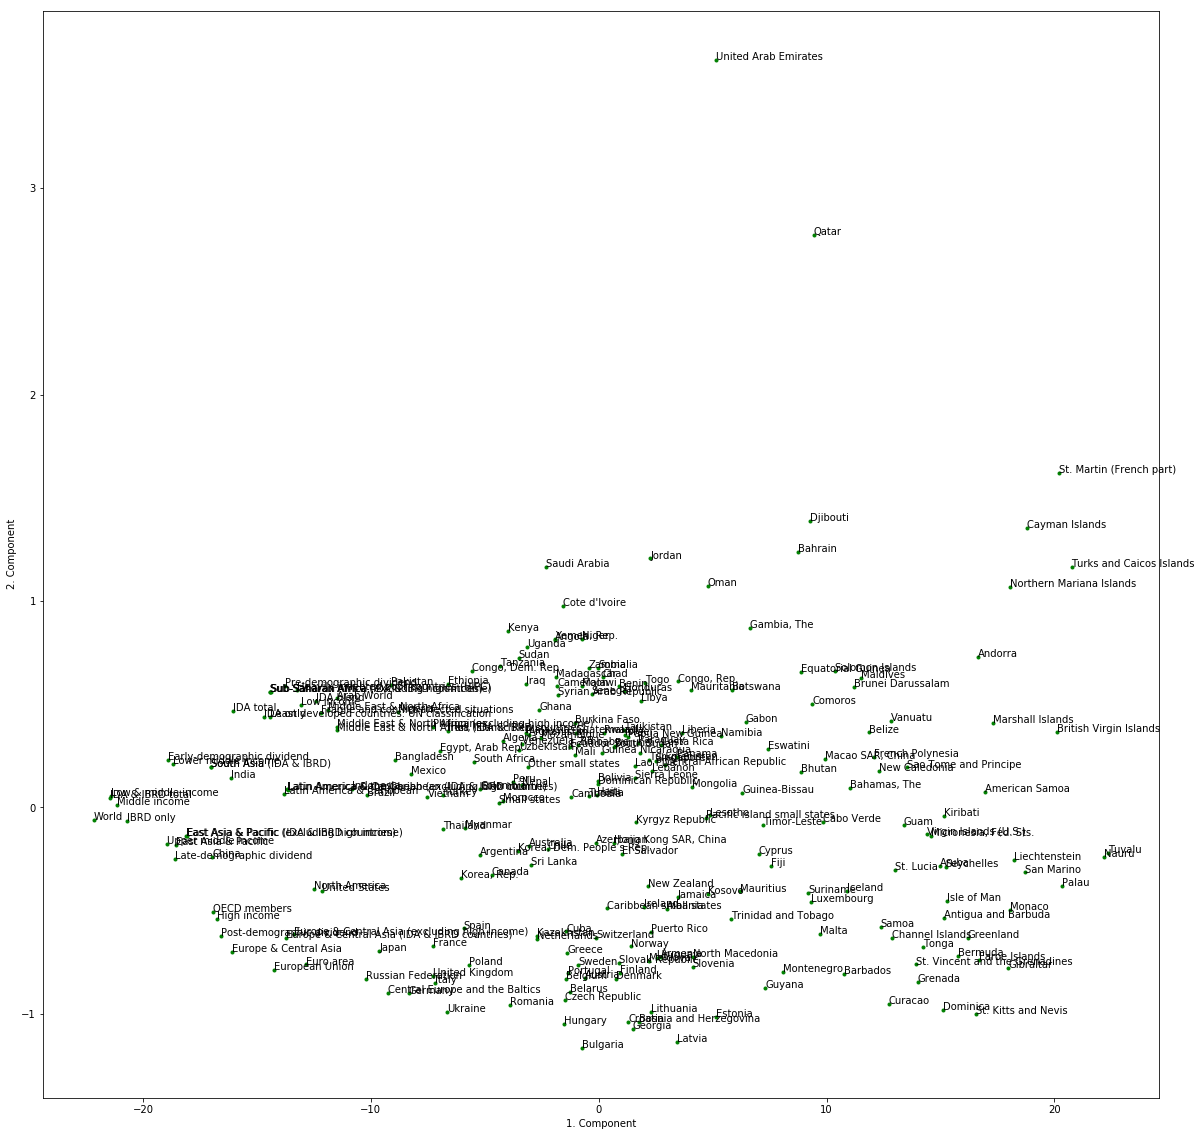

In [10]:
fig = plt.figure(figsize=(20, 20))
ax = plt.subplot()


ax.plot(vecs[:,0], vecs[:,1], "g.")
for i in range(len(wpop.index)):
    ax.annotate(wpop.index[i], (vecs[i,0], vecs[i,1]))
 
ax.set_xlabel('1. Component')
ax.set_ylabel('2. Component')



In [60]:
def plot_subs(ax, xs, ys, xlabel, ylabel):

    ax.plot(xs, ys, "g.")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

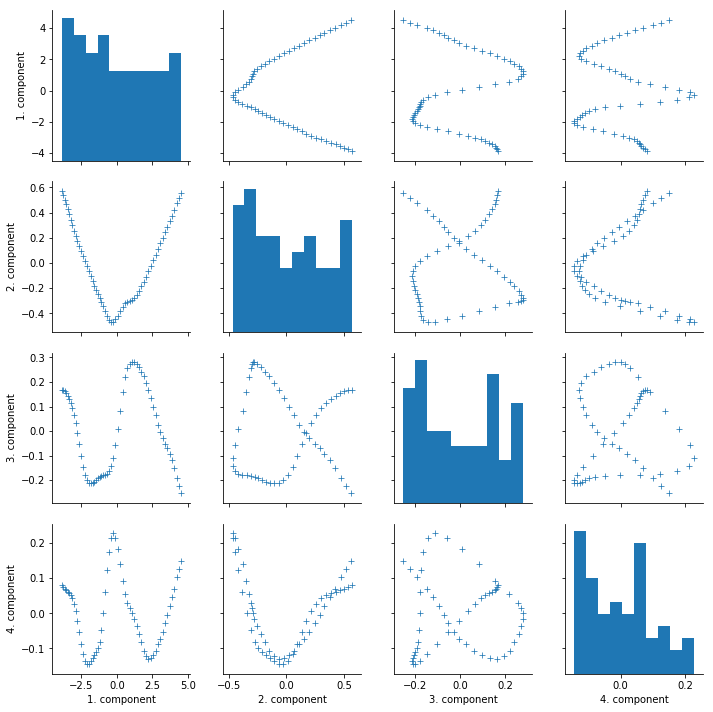

In [49]:
sns.pairplot(pd.DataFrame(vecs1, columns=["1. component", "2. component", "3. component", "4. component"]), markers="+")

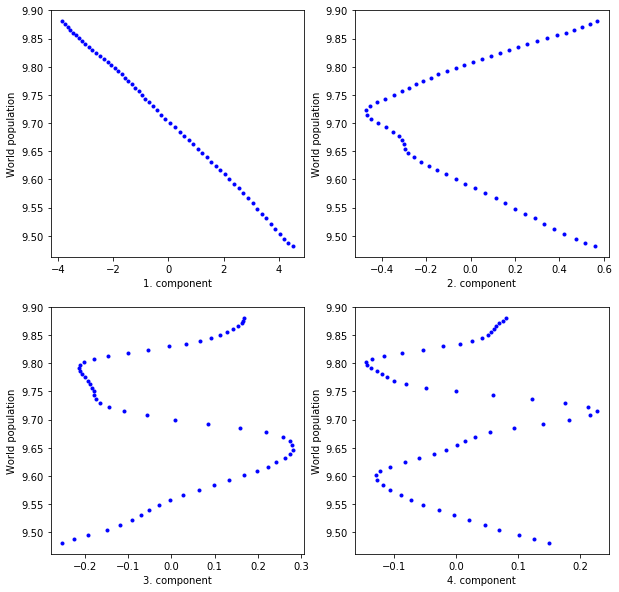

In [54]:
counter = 0
plt.figure(figsize=(10, 10))
for i in range(len(vecs[0,:])):
    plt.subplot(2, 2, counter+1)
    plt.plot(vecs1[:,i], wpop.loc["World",:], "b.")
    plt.ylabel("World population")
    plt.xlabel(str(i+1) + ". component")
    
    counter += 1

Text(0.5,0,'2. component')

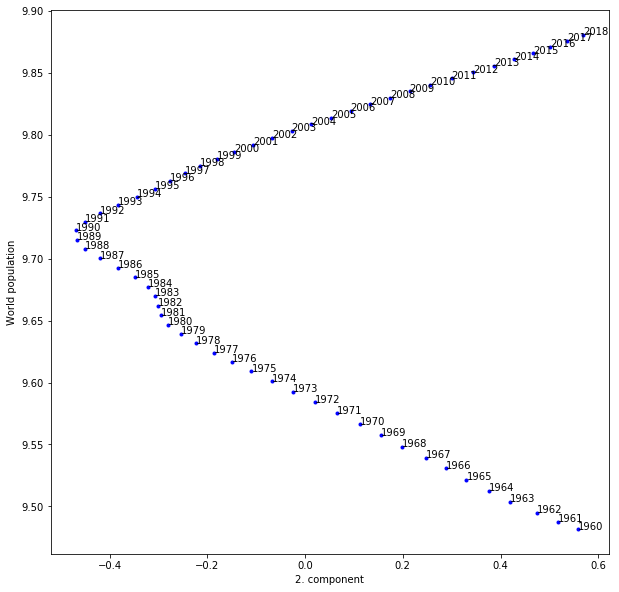

In [20]:
plt.figure(figsize=(10, 10))
ax=plt.subplot()
ax.plot(vecs1[:,1], wpop.loc["World",:], "b.")
for i in range(len(wpop.columns)):
    ax.annotate(wpop.columns[i], (vecs1[i,1], wpop.loc["World",:][i]))
    
plt.ylabel("World population")
plt.xlabel("2. component")

Text(0.5,0,'3. component')

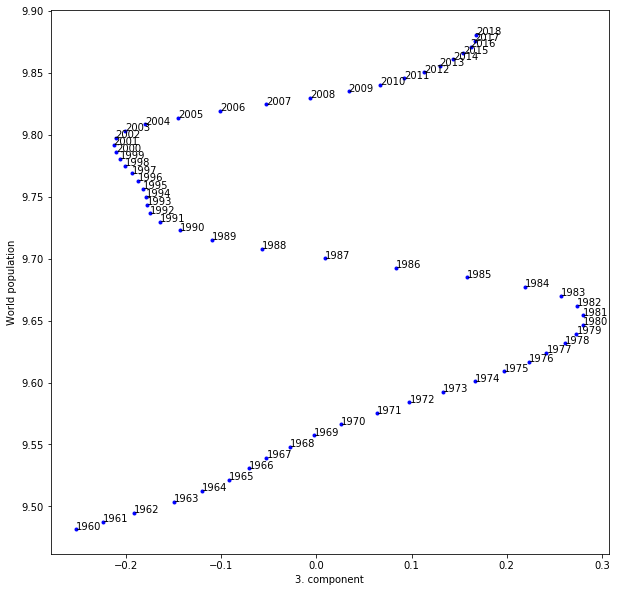

In [21]:
plt.figure(figsize=(10, 10))
ax=plt.subplot()
ax.plot(vecs1[:,2], wpop.loc["World",:], "b.")
for i in range(len(wpop.columns)):
    ax.annotate(wpop.columns[i], (vecs1[i,2], wpop.loc["World",:][i]))
    
plt.ylabel("World population")
plt.xlabel("3. component")

Text(0.5,0,'4. component')

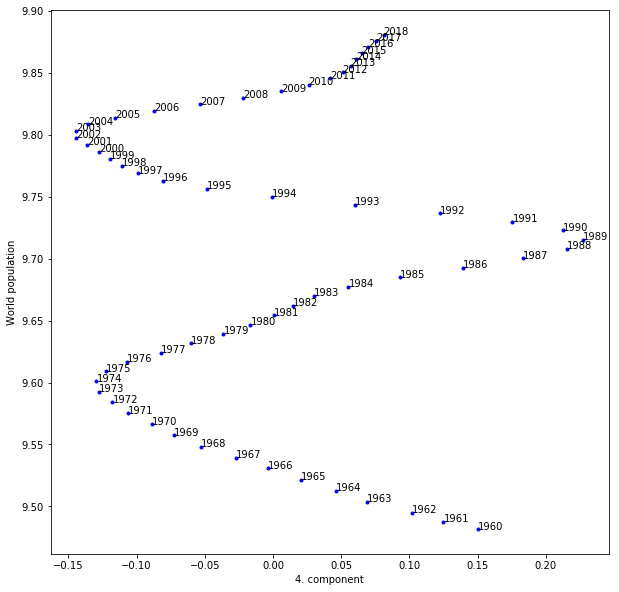

In [22]:
plt.figure(figsize=(10, 10))
ax=plt.subplot()
ax.plot(vecs1[:,3], wpop.loc["World",:], "b.")
for i in range(len(wpop.columns)):
    ax.annotate(wpop.columns[i], (vecs1[i,3], wpop.loc["World",:][i]))
    
plt.ylabel("World population")
plt.xlabel("4. component")

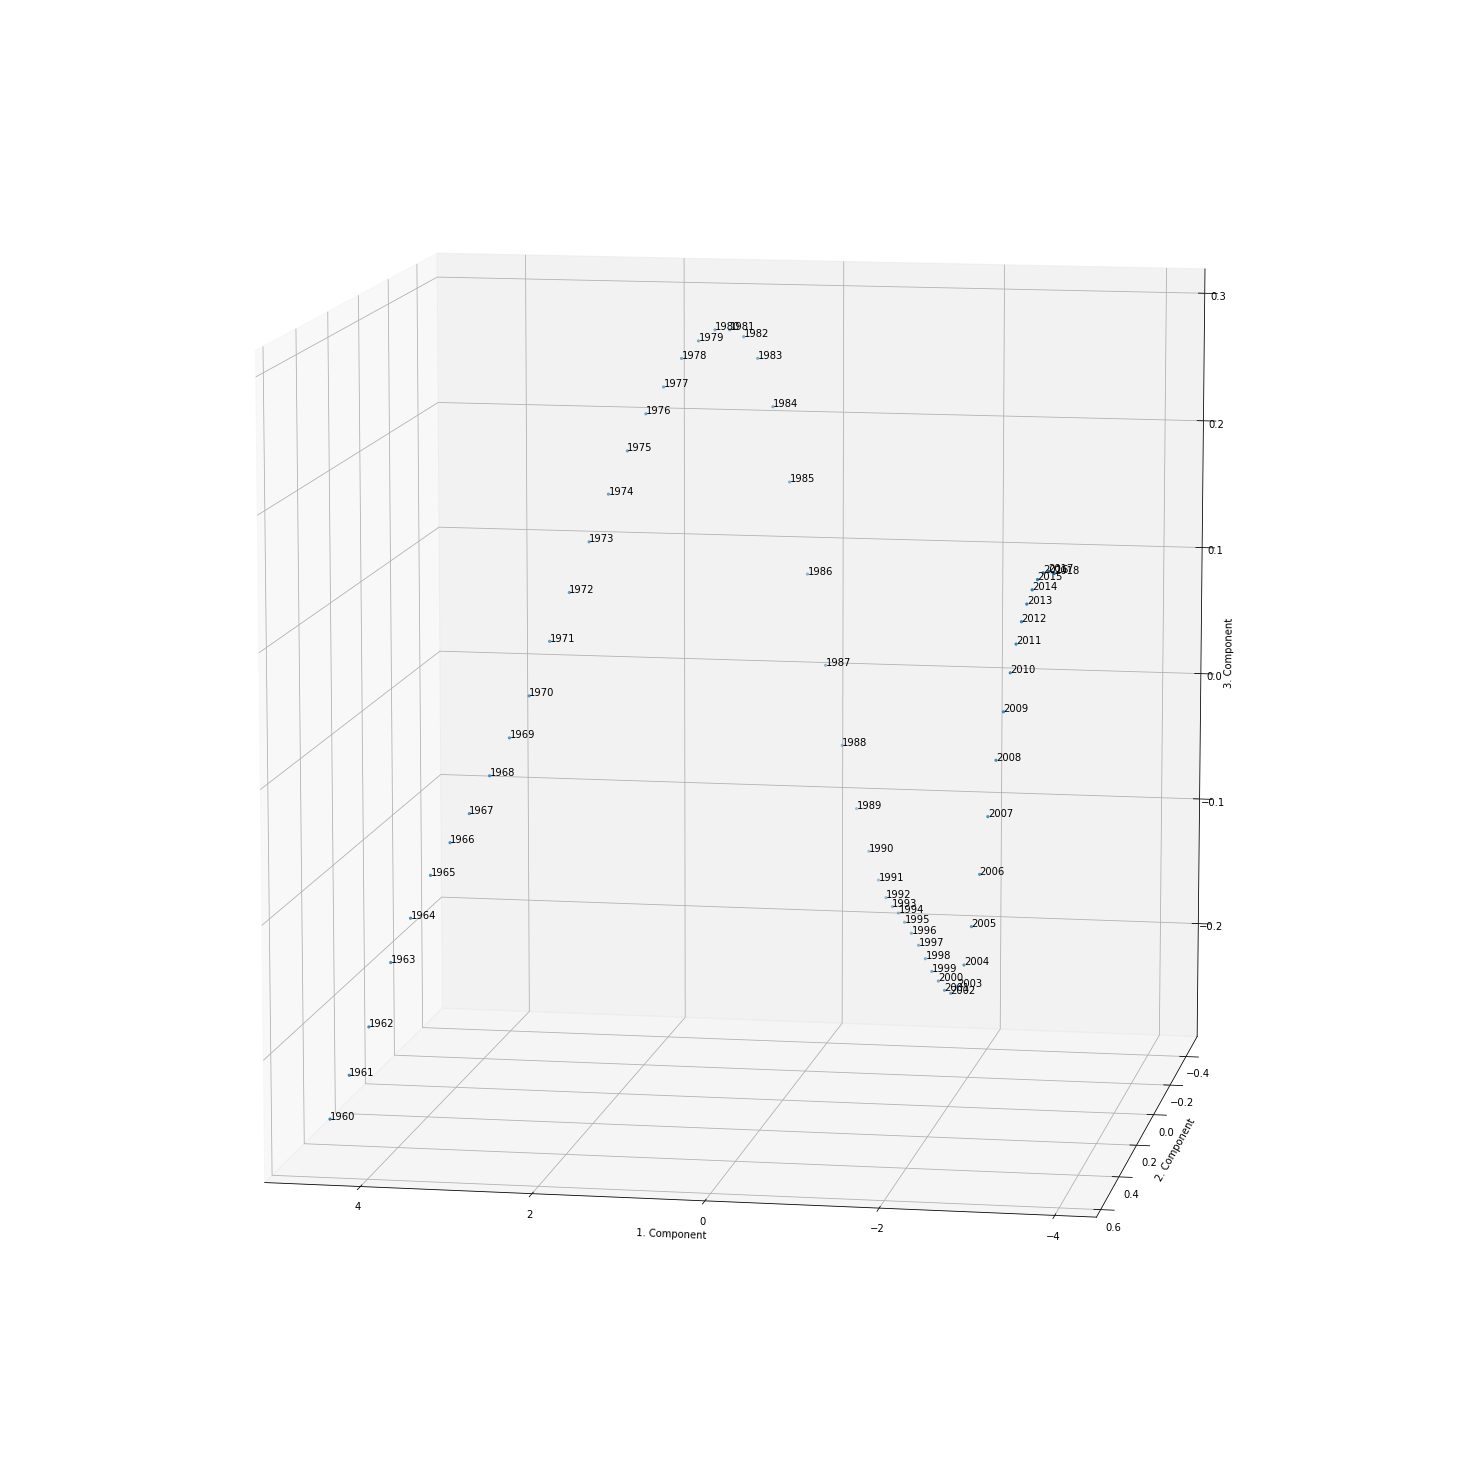

In [18]:
fig = plt.figure(figsize=(20, 20))
ax = Axes3D(fig)


ax.scatter(vecs1[:,0], vecs1[:,1], vecs1[:,2], marker=".")
for i in range(len(wpop.columns)):
    ax.text(vecs1[i,0], vecs1[i,1], vecs1[i,2], wpop.columns[i])

ax.set_xlabel('1. Component')
ax.set_ylabel('2. Component')
ax.set_zlabel('3. Component')
ax.view_init(elev=10, azim=100)
plt.show()

In [107]:
for i in range(len(vecs[0,:])):
    print(pd.DataFrame(vecs, index=wpop.index).sort_values(i, ascending=False).iloc[0:4, i])

Country Name
Tuvalu                      22.364332
Nauru                       22.172432
Turks and Caicos Islands    20.753113
Palau                       20.343291
Name: 0, dtype: float64
Country Name
United Arab Emirates        3.622106
Qatar                       2.775507
St. Martin (French part)    1.620481
Djibouti                    1.386909
Name: 1, dtype: float64
Country Name
Djibouti                    0.596889
Virgin Islands (U.S.)       0.525375
United Arab Emirates        0.484443
St. Martin (French part)    0.438623
Name: 2, dtype: float64
Country Name
St. Martin (French part)    0.519231
Northern Mariana Islands    0.474985
Turks and Caicos Islands    0.191345
Equatorial Guinea           0.185770
Name: 3, dtype: float64


In [108]:
for i in range(len(vecs1[0,:])):
    print(pd.DataFrame(vecs1, index=wpop.columns).sort_values(i, ascending=False).iloc[0:4, i])


1960    4.511249
1961    4.357458
1962    4.198588
1963    4.034754
Name: 0, dtype: float64
2018    0.569206
1960    0.558617
2017    0.536320
1961    0.516656
Name: 1, dtype: float64
1980    0.280241
1981    0.279607
1982    0.274109
1979    0.273134
Name: 2, dtype: float64
1989    0.227485
1988    0.215726
1990    0.212910
1987    0.183036
Name: 3, dtype: float64


In [114]:
for i in range(len(vecs[0,:])):
    print(pd.DataFrame(vecs, index=wpop.index).sort_values(i, ascending=True).iloc[0:4, i])

Country Name
World                 -22.162395
IDA & IBRD total      -21.448577
Low & middle income   -21.423108
Middle income         -21.135533
Name: 0, dtype: float64
Country Name
Bulgaria   -1.167790
Latvia     -1.138212
Georgia    -1.074508
Hungary    -1.051287
Name: 1, dtype: float64
Country Name
Equatorial Guinea          -0.596794
Afghanistan                -0.434928
Turks and Caicos Islands   -0.391068
St. Kitts and Nevis        -0.340486
Name: 2, dtype: float64
Country Name
United Arab Emirates    -0.459318
Qatar                   -0.452991
Virgin Islands (U.S.)   -0.293318
South Sudan             -0.178034
Name: 3, dtype: float64


In [119]:
for i in range(len(vecs1[0,:])):
    print(pd.DataFrame(vecs1, index=wpop.columns).sort_values(i, ascending=True).iloc[0:4, i])

2018   -3.861893
2017   -3.762831
2016   -3.662166
2015   -3.558976
Name: 0, dtype: float64
1990   -0.468906
1989   -0.466681
1991   -0.450851
1988   -0.449708
Name: 1, dtype: float64
1960   -0.252236
1961   -0.223733
2001   -0.212677
2002   -0.210492
Name: 2, dtype: float64
2003   -0.144514
2002   -0.144284
2001   -0.136469
2004   -0.135602
Name: 3, dtype: float64
